<a href="https://colab.research.google.com/github/jasminenessa/datathon1.0/blob/main/productreviewanalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

USE languafe translators to filter dialect words from corpus/

AIM-  
1) Categorize & analyse the reviews to calculate the percentage of positive & negative reviews.  
2) Calculate the total rating on a scale of 5 for each category.  
3)Create a Ranking table for each Mobile phone based on each category and overall ranking.


#DATA CLEANING

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import warnings
warnings.filterwarnings('ignore')

# !pip install scikit-plot
# nltk.download("popular")

In [2]:
df=pd.read_csv('/content/Flipkart_Amazon Mobile Reviews.csv')
df

,Unnamed: 0,Review-Title,rating,Review-Body,Product Name
0,0,Worst phone ever,1.0 out of 5 stars,Hang problem,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12..."
1,1,Ok !!! Not up to the mark,2.0 out of 5 stars,I'm writing this review after using 3days !!!B...,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12..."
2,2,Awesome look,5.0 out of 5 stars,Camera is so good n very fast phone back look ...,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12..."
3,3,One plus losing is originality!!!,3.0 out of 5 stars,The media could not be loaded.\n ...,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12..."
4,4,Read,1.0 out of 5 stars,I got my delivery on 23 feb when I unboxed the...,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12..."
...,...,...,...,...,...
23772,23772,Batten in this rangee,4.0 out of 5 stars,Must he Bhai iss range me bas cemra thoda sa s...,"vivo iQOO Z6 5G (Chromatic Blue, 6GB RAM, 128G..."
23773,23773,Good mobile,4.0 out of 5 stars,Good product,"vivo iQOO Z6 5G (Chromatic Blue, 6GB RAM, 128G..."
23774,23774,Good camera,5.0 out of 5 stars,Good,"vivo iQOO Z6 5G (Chromatic Blue, 6GB RAM, 128G..."
23775,23775,Warest mobile,1.0 out of 5 stars,Don't buy this mobile phone money weast screen...,"vivo iQOO Z6 5G (Chromatic Blue, 6GB RAM, 128G..."


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23777 entries, 0 to 23776
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    23777 non-null  int64 
 1   Review-Title  23775 non-null  object
 2   rating        23777 non-null  object
 3   Review-Body   23160 non-null  object
 4   Product Name  23777 non-null  object
dtypes: int64(1), object(4)
memory usage: 928.9+ KB


In [4]:
df['Review-Title'] = df['Review-Title'].fillna(method='ffill',limit=2)

In [5]:
#Data Type and Cleaning have been taken care of here
df['rating'] = df['rating'].str.replace(' out of 5 stars','')
df['rating'] = df['rating'].astype('float')

In [6]:
df = df.sort_values(by='rating',ascending=False)

In [7]:
df['New Rating']=df['rating']
d={1:'Negative',2:'Negative',
   3:'Negative',
   4:'Positive',5:'Positive'}
df['New Rating'] = df['New Rating'].map(d)

In [8]:
df['Product Name']=df['Product Name'].str.replace('(',',') 
df['Product Name']=df['Product Name'].str.replace(')','') 
df['Product Name']=df['Product Name'].str.replace('Redmi 10 Prime ,Bifrost Blue 4GB RAM 64GB ROM','Redmi 10 Prime ,Bifrost Blue, 4GB RAM, 64GB Storage') 
df['Product Name']=df['Product Name'].str.replace('+',',') 


df['Product Name'].value_counts() 
df_temp=df['Product Name'].str.split(',',expand=True) 
df=pd.concat([df,df_temp],axis=1)
df.drop('Product Name',axis=1,inplace=True)
df.rename(columns={0:'Product Name',1:'Product Color',2:'RAM',3:'ROM'},inplace=True)


#As there are observable usage of emoticons in the dataset so we are focussing on stripping them along with Puntuations.
df['Review-Title']=df['Review-Title'].str.extract('([a-zA-Z\s]+)',expand=False).str.lower()
df['Review-Body']=df['Review-Body'].str.extract('([a-zA-Z\s]+)',expand=False).str.lower()
df['Product Name']=df['Product Name'].str.lower()
df['Product Color']=df['Product Color'].str.lower()
df['RAM']=df['RAM'][0][1] 
df['ROM']=df['ROM'].str.extract('(\d\d\d|\d\d)')
df['ROM'].fillna(method='ffill',limit=2,inplace=True)
df['ROM'].fillna(method='bfill',limit=2,inplace=True)
df['ROM'].fillna('64',inplace=True)
df['RAM']=df['RAM'].astype('int')
df['ROM']=df['ROM'].astype('int')

df['Review-Body'].fillna('',inplace=True)

punct=[',','!','?',';']
for pun in punct:
  df['Review-Body'] = df['Review-Body'].str.replace(pun,'.')
for pun in punct:
  df['Review-Title'] = df['Review-Title'].str.replace(pun,'.')
df

,Unnamed: 0,Review-Title,rating,Review-Body,New Rating,Product Name,Product Color,RAM,ROM
9796,9796,good mobile verry nice,5.0,goood good verry nice jitna kha jaye usase ach...,Positive,realme narzo 50a,oxygen blue,8,64
7289,7289,phone is good but after few months heating pro...,5.0,goodnight,Positive,oppo a31,mystery black,8,128
14768,14768,good,5.0,fingerprint superb battery life poorcamera ave...,Positive,redmi 9 activ,carbon black,8,64
7267,7267,nice product,5.0,nice product,Positive,oppo a31,mystery black,8,128
14767,14767,liked it,5.0,whole world in your pocket,Positive,redmi 9 activ,carbon black,8,64
...,...,...,...,...,...,...,...,...,...
13333,13333,worst phone dont byee overall performance is bad,1.0,worst phone dont byee overall performance is bad,Negative,redmi 10 prime,bifrost blue,8,64
13332,13332,worst camera after,1.0,you can,Negative,redmi 10 prime,bifrost blue,8,64
13330,13330,bad camera quality,1.0,very worst mobile,Negative,redmi 10 prime,bifrost blue,8,64
13329,13329,please dont purchase no exchange offer,1.0,please dont purchase no exchange offer not goo...,Negative,redmi 10 prime,bifrost blue,8,64


In [9]:
pd.pivot_table(df,values=['rating'],columns=['Product Name'])

Product Name,oneplus nord ce 2 5g,oppo a31,realme narzo 50a,redmi 10 prime,redmi 9 activ,redmi note 11,samsung galaxy m32,vivo iqoo z6 5g
rating,3.760224,3.727021,3.66482,3.27707,3.400897,3.303598,3.184328,3.321353


In [10]:
dn=df[df.duplicated()]
dn
#There are no need to remove the duplications, only if more trustworthy features such as timestamp or review id were given.
del(dn)

In [11]:
#Assuming rating=3 as Neutral in general
pos=0
neg=0
neut=0
for i in df.rating:
  if i>3:
    pos+=1
  elif i<=3:
    neg+=1
print('Positives:',pos,'-->',100*pos/(pos+neg),'%')
print('Negatives:',neg,' -->',100*neg/(pos+neg),'%')

Positives: 14285 --> 60.07906800689742 %
Negatives: 9492  --> 39.92093199310258 %


In [12]:
df.groupby('Product Name').rating.value_counts().mean()

594.425

In [13]:
rankdf = pd.DataFrame()
rankdf['Mean'] = df.groupby(['Product Name']).rating.mean()
rankdf.sort_values(by='Mean',ascending=False,inplace=True)

In [14]:
ranks=np.arange(1,9)
rankdf['Overall Ranking'] = ranks
rankdf

,Mean,Overall Ranking
Product Name,,
oneplus nord ce 2 5g,3.760224,1
oppo a31,3.727021,2
realme narzo 50a,3.664820,3
redmi 9 activ,3.400897,4
vivo iqoo z6 5g,3.321353,5
redmi note 11,3.303598,6
redmi 10 prime,3.277070,7
samsung galaxy m32,3.184328,8


As all mean have negligible difference, hence, this can not be used as a reliable measurement for ranking of product.

Here we checked for null values, data redunduncy, improper data types and cleaned data format using regex.   
Conclusion-  
Our Data is cleaned and ready for EDA.

#EDA


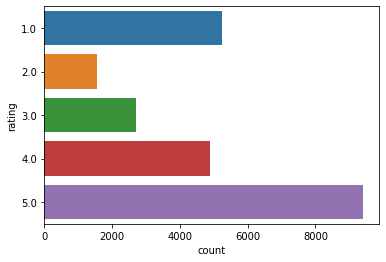

In [15]:
sns.countplot(y=df['rating'])

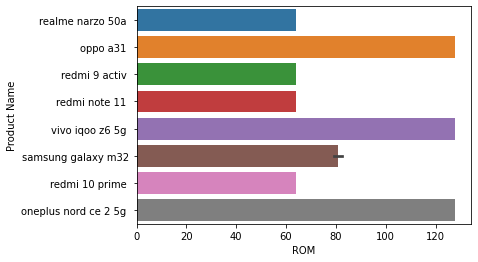

In [16]:
sns.barplot(x=df.ROM, y=df['Product Name'])

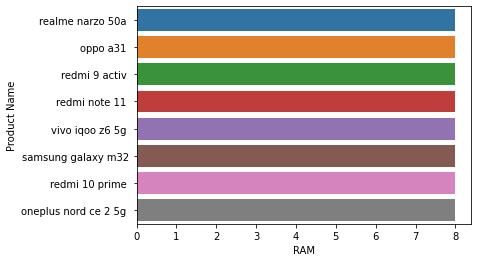

In [17]:
sns.barplot(x=df.RAM, y=df['Product Name'])

In [18]:
df2 = df.groupby(['Product Name','New Rating']).count()[['rating']]
df2

rating
Product Name          New Rating        
oneplus nord ce 2 5g  Negative      1164
                      Positive      2406
oppo a31              Negative      1418
                      Positive      2912
realme narzo 50a      Negative       742
                      Positive      1424
redmi 10 prime        Negative      1731
                      Positive      2037
redmi 9 activ         Negative      1896
                      Positive      2564
redmi note 11         Negative      1244
                      Positive      1480
samsung galaxy m32    Negative       654
                      Positive       686
vivo iqoo z6 5g       Negative       643
                      Positive       776

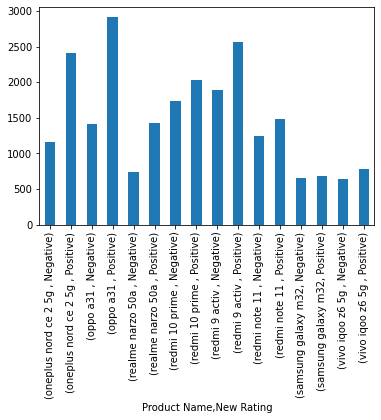

In [19]:
df.groupby(['Product Name','New Rating']).rating.count().plot(kind='bar')

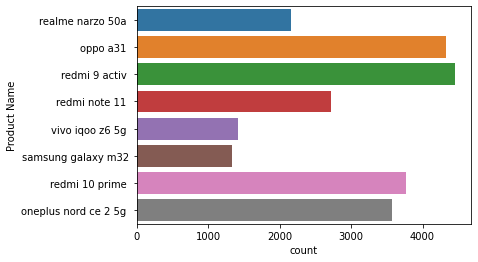

In [20]:
sns.countplot(y=df['Product Name'])

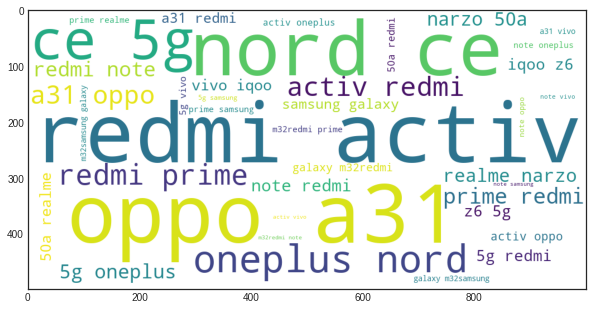

In [21]:
from wordcloud import WordCloud
import re

from matplotlib import style,rcParams
style.use('seaborn-white')
rcParams['figure.figsize'] = 10,5
import warnings
warnings.filterwarnings('ignore')

rcParams['figure.figsize'] = 10,8
word_cloud = ""
for row in df['Product Name'].values:
    for word in row:
        word_cloud+=" ".join(word)

wordcloud = WordCloud(width = 1000, height = 500,background_color ='white',min_font_size = 10).generate(word_cloud)
plt.imshow(wordcloud)

#Feature Engineering

##Tokenization

In [22]:
df['Tokenized_RB'] = df['Review-Body'].str.split()
df['Tokenized_RT'] = df['Review-Title'].str.split()

In [23]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [24]:
neg_list =set(['none','not','never','nor','no','shouldn\'t','chouldn\'t','weren\'t','don\'t','didn\'t','shalln\'t,wouldn\'t','doesn\'t','won\'t','wasn\'t',\
          'very','so','needn\'t','isn\'t','shoudn','wouldn','don','weren','shalln','wasn','didn','isn','haven\'t','hadn\'t','hasn\'t','haven','hasn'\
          'needn','aren\'t','aren'])
# plus_list =['please','is','for','to','from','beacause','by','in']

STOPwords=stop_words.difference(neg_list)
STOPwords=list(STOPwords)

In [25]:
dfn = df[['Tokenized_RB','Tokenized_RT']].copy()
dfn['Tokenized_RB'].fillna('',inplace=True)
dfn['Tokenized_RT'].fillna('',inplace=True)
dfn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23777 entries, 9796 to 11888
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Tokenized_RB  23777 non-null  object
 1   Tokenized_RT  23777 non-null  object
dtypes: object(2)
memory usage: 1.0+ MB


In [26]:
raw_corpusB=[]
row=[]
for sentence in dfn['Tokenized_RB']:
  row=[]
  for word in sentence:
    if word in STOPwords:
      pass
    else:
      row.append(word)
  raw_corpusB.append(row)

raw_corpusT = []
row=[]
for sentence in dfn['Tokenized_RT']:
  row=[]
  for word in sentence:
    if word in STOPwords:
      pass
    else:
      row.append(word)
  raw_corpusT.append(row)

In [27]:
corpusRB=[]
for i in raw_corpusB:
  i=' '.join(i)
  corpusRB.append(i)

corpusRT=[]
for i in raw_corpusT:
  i=' '.join(i)
  corpusRT.append(i)

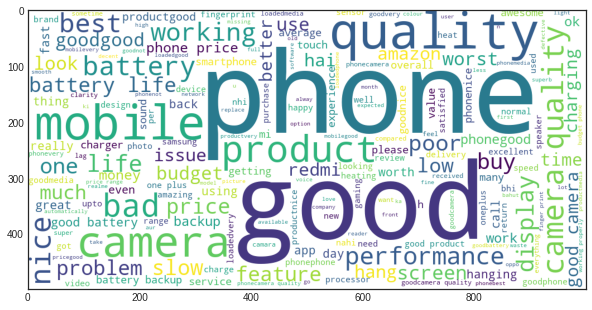

In [28]:
word_cloud = ""
for row in corpusRB:
    for word in row:
      word_cloud+=" ".join(word)

wordcloud = WordCloud(width = 1000, height = 500,background_color ='white',min_font_size = 10).generate(word_cloud)
plt.imshow(wordcloud)

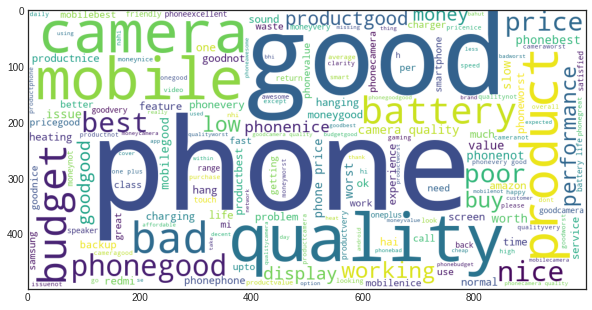

In [29]:
word_cloud = ""
for row in corpusRT:
    for word in row:
      word_cloud+=" ".join(word)

wordcloud = WordCloud(width = 1000, height = 500,background_color ='white',min_font_size = 10).generate(word_cloud)
plt.imshow(wordcloud)

In [30]:
del(raw_corpusB)
del(raw_corpusT)
del(neg_list)
del(df2,d,dfn)
del(df_temp)
del(neg,pos)
del(rankdf)

CONCLUSION-  
Our Courpus is ready for processing.

#Semantic Analysis

In [31]:
df

,Unnamed: 0,Review-Title,rating,Review-Body,New Rating,Product Name,Product Color,RAM,ROM,Tokenized_RB,Tokenized_RT
9796,9796,good mobile verry nice,5.0,goood good verry nice jitna kha jaye usase ach...,Positive,realme narzo 50a,oxygen blue,8,64,"[goood, good, verry, nice, jitna, kha, jaye, u...","[good, mobile, verry, nice]"
7289,7289,phone is good but after few months heating pro...,5.0,goodnight,Positive,oppo a31,mystery black,8,128,[goodnight],"[phone, is, good, but, after, few, months, hea..."
14768,14768,good,5.0,fingerprint superb battery life poorcamera ave...,Positive,redmi 9 activ,carbon black,8,64,"[fingerprint, superb, battery, life, poorcamer...",[good]
7267,7267,nice product,5.0,nice product,Positive,oppo a31,mystery black,8,128,"[nice, product]","[nice, product]"
14767,14767,liked it,5.0,whole world in your pocket,Positive,redmi 9 activ,carbon black,8,64,"[whole, world, in, your, pocket]","[liked, it]"
...,...,...,...,...,...,...,...,...,...,...,...
13333,13333,worst phone dont byee overall performance is bad,1.0,worst phone dont byee overall performance is bad,Negative,redmi 10 prime,bifrost blue,8,64,"[worst, phone, dont, byee, overall, performanc...","[worst, phone, dont, byee, overall, performanc..."
13332,13332,worst camera after,1.0,you can,Negative,redmi 10 prime,bifrost blue,8,64,"[you, can]","[worst, camera, after]"
13330,13330,bad camera quality,1.0,very worst mobile,Negative,redmi 10 prime,bifrost blue,8,64,"[very, worst, mobile]","[bad, camera, quality]"
13329,13329,please dont purchase no exchange offer,1.0,please dont purchase no exchange offer not goo...,Negative,redmi 10 prime,bifrost blue,8,64,"[please, dont, purchase, no, exchange, offer, ...","[please, dont, purchase, no, exchange, offer]"


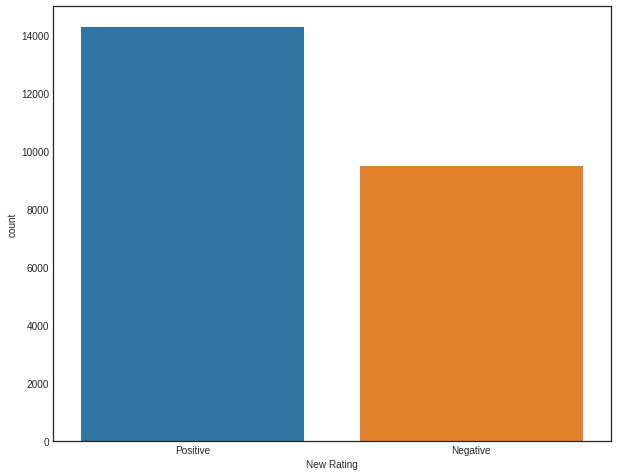

In [32]:
sns.countplot(df['New Rating'])

In [33]:
dfn=pd.DataFrame()
dfn[['Review','label']]= df[['Review-Body','New Rating']]

In [34]:
dfn

,Review,label
9796,goood good verry nice jitna kha jaye usase ach...,Positive
7289,goodnight,Positive
14768,fingerprint superb battery life poorcamera ave...,Positive
7267,nice product,Positive
14767,whole world in your pocket,Positive
...,...,...
13333,worst phone dont byee overall performance is bad,Negative
13332,you can,Negative
13330,very worst mobile,Negative
13329,please dont purchase no exchange offer not goo...,Negative


#Product Ranking

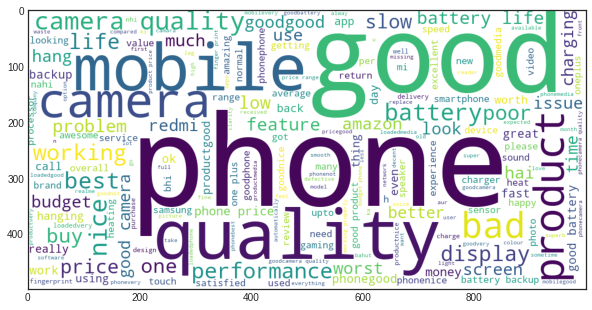

In [35]:
word_cloud = ""
for row in corpusRB:
    for word in row:
      word_cloud+=" ".join(word)

wordcloud = WordCloud(width = 1000, height = 500,background_color ='white',min_font_size = 10).generate(word_cloud)
plt.imshow(wordcloud)

In [36]:
f={'Positive':1,
   'Negative':0}
df['New Rating'] = df['New Rating'].map(f)

In [37]:
import re
cam_key=['camera','pic','pix','picture','image','img','photo','pixel','megapixel','apeture',]
disp_key=['display','screen','resolution','size','amoled']
bat_key=['battery','charging','charg','small','large','huge']
perf_key=['fast','performance','slow','speed','proccess','snap','dragon','mediatek','chip','hang']
val_for_money=['value for money','worthy']#,'cost','pricy','price']
costly=['problem']

query_cam='|'.join(cam_key)
query_disp='|'.join(disp_key)
query_bat='|'.join(bat_key)
query_perf='|'.join(perf_key)
query_cam='|'.join(val_for_money)
query_cam='|'.join(costly)

In [38]:
def findKey(row,query):
  res=[]
  if re.search('({})'.format(query),row):
    return 1
  else:
    return 0


def validation(crev,rating):
  if crev==1.0:
    if rating<3:
      return -1
    else:
      return crev
  else:
    return crev

In [39]:
df['Camera']=df['Review-Body'].apply(lambda x : findKey(x,query_cam))
df['Display']=df['Review-Body'].apply(lambda x : findKey(x,query_disp))
df['Battery']=df['Review-Body'].apply(lambda x : findKey(x,query_bat))
df['Performance']=df['Review-Body'].apply(lambda x : findKey(x,query_perf))
df['Value for Money']=df['Review-Body'].apply(lambda x : findKey(x,val_for_money))
df['Costly']=df['Review-Body'].apply(lambda x : findKey(x,costly))

df['Camera']=df.apply(lambda x : validation(x['Camera'],x['rating']),axis=1)
df['Display']=df.apply(lambda x : validation(x['Display'],x['rating']),axis=1)
df['Battery']=df.apply(lambda x : validation(x['Battery'],x['rating']),axis=1)
df['Performance']=df.apply(lambda x : validation(x['Performance'],x['rating']),axis=1)
df['Value for Money']=df.apply(lambda x : validation(x['Value for Money'],x['rating']),axis=1)
df['Costly']=df.apply(lambda x : validation(x['Costly'],x['rating']),axis=1)

In [40]:
#####After this drop all the rows where value of all features in same row is 0.
#####Should i drop the dupls in positive as they are almost double the negatives
df.columns

Index(['Unnamed: 0', 'Review-Title', 'rating', 'Review-Body', 'New Rating',
       'Product Name', 'Product Color', 'RAM', 'ROM', 'Tokenized_RB',
       'Tokenized_RT', 'Camera', 'Display', 'Battery', 'Performance',
       'Value for Money', 'Costly'],
      dtype='object')

In [41]:
dfn=pd.DataFrame()
dfn[['New Rating','Product Name','Camera','Display','Battery','Performance','Costly','Value for Money']] = df[['New Rating','Product Name','Camera','Display','Battery','Performance','Costly','Value for Money']].copy()


In [42]:
dfn['Total'] = dfn.sum(axis=1)
dfn.head()

,New Rating,Product Name,Camera,Display,Battery,Performance,Costly,Value for Money,Total
9796,1,realme narzo 50a,0,0,0,0,1,1,3
7289,1,oppo a31,0,0,0,0,1,1,3
14768,1,redmi 9 activ,0,0,1,0,1,1,4
7267,1,oppo a31,0,0,0,0,1,1,3
14767,1,redmi 9 activ,0,0,0,0,1,1,3


In [43]:
### phone by phone har cheez ka total. ek ek feature ka!
dfn.groupby('Product Name')[['Camera','Display','Battery','Performance','Costly','Value for Money']].sum()

,Camera,Display,Battery,Performance,Costly,Value for Money
Product Name,,,,,,
oneplus nord ce 2 5g,-16,31,186,95,1763,1817
oppo a31,-16,13,98,-24,2128,2215
realme narzo 50a,-4,5,101,11,1041,1078
redmi 10 prime,-34,-9,91,-10,983,1008
redmi 9 activ,-10,29,188,17,1754,1793
redmi note 11,-9,90,108,10,922,940
samsung galaxy m32,-8,40,62,-25,347,355
vivo iqoo z6 5g,-2,10,56,35,464,479


In [44]:
# Ranking process
# wont 'not' affects you corpus here
# what are these given hyper-parameters exactly

In [45]:
X = dfn[['Camera','Battery','Display','Performance','Costly','Value for Money']].values
# X = dfn[['Camera','Battery','Display','Performance','Costly']].values
y = dfn['New Rating'].values

In [46]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=3) # this is random splitting

In [47]:
from sklearn.linear_model import LogisticRegression #main code that build the LR model 
logistic_regression= LogisticRegression() #initialise the required package
logistic_regression.fit(X_train,y_train) #magic happens - best values of betas - training/learning happens here
y_pred=logistic_regression.predict(X_test)
y_pred

array([0, 1, 0, ..., 1, 1, 1])

In [48]:
logistic_regression.predict_proba(X_test)

array([[0.97611111, 0.02388889],
       [0.13836156, 0.86163844],
       [0.97611111, 0.02388889],
       ...,
       [0.13836156, 0.86163844],
       [0.13836156, 0.86163844],
       [0.13836156, 0.86163844]])

In [49]:
logistic_regression.coef_, logistic_regression.intercept_

(array([[-0.64383152, -0.28895255, -0.41623227, -0.60182842,  0.19943597,
          2.57012833]]), array([-0.94059879]))

In [50]:
score = logistic_regression.score(X_test,y_test)
print(score * 100,"%")

86.75357443229605 %


Eval Metric

0.8675357443229604
[[2015  795]
 [ 150 4174]]
0.8983105563327235
0.8675357443229604


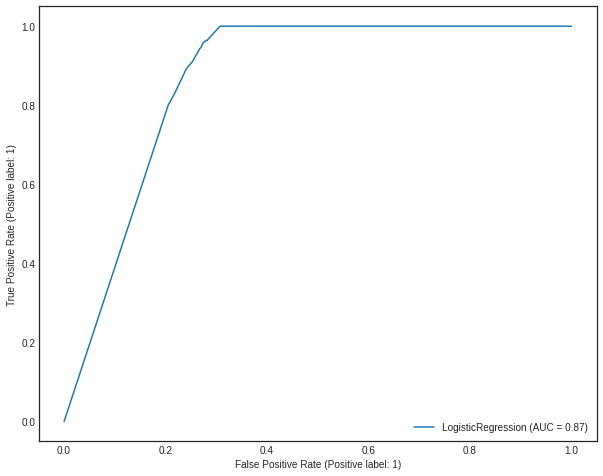

In [51]:
from sklearn.metrics import plot_roc_curve, roc_curve, roc_auc_score, confusion_matrix, f1_score
print(logistic_regression.score(X_test,y_test)) # accuracy
print(confusion_matrix(y_test,y_pred))
print(f1_score(y_test,y_pred))
print(logistic_regression.score(X_test,y_test))
plot_roc_curve(logistic_regression, X_test, y_test)


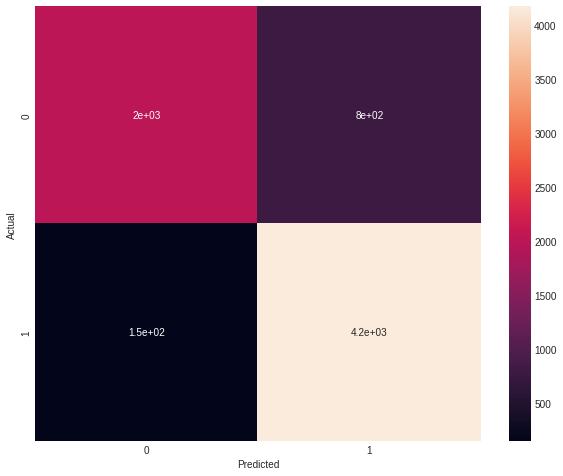

In [52]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

In [53]:
# confusion_matrix(y_test,y_pred)